In [19]:
import pandas as pd
import numpy as np

from tqdm.auto import tqdm
from tqdm.notebook import tqdm, trange

import time
from time import sleep

import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid
import cv2
import os
import pathlib
import imageio
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import cv2
import glob
import seaborn as sns
import random
from sklearn.utils import resample

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device, torch.get_num_threads()

(device(type='cpu'), 1)

DATA PREPARATION

In [47]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
! unzip /content/chest-xray-pneumonia.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/chest-xray-pneumonia.zip
replace chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [45]:
categories = ['NORMAL', 'PNEUMONIA']

In [46]:
base_dir = "/content/chest_xray/"

train_pneumonia_dir = base_dir+'train/PNEUMONIA/'
train_normal_dir=base_dir+'train/NORMAL/'

test_pneumonia_dir = base_dir+'test/PNEUMONIA/'
test_normal_dir = base_dir+'test/NORMAL/'

val_pneumonia_dir= base_dir+'val/PNEUMONIA/'
val_normal_dir= base_dir+'val/NORMAL/'

train_pn = [train_pneumonia_dir+"{}".format(i) for i in os.listdir(train_pneumonia_dir) ]
train_normal = [train_normal_dir+"{}".format(i) for i in os.listdir(train_normal_dir) ]

test_normal = [test_normal_dir+"{}".format(i) for i in os.listdir(test_normal_dir)]
test_pn = [test_pneumonia_dir+"{}".format(i) for i in os.listdir(test_pneumonia_dir)]

val_pn= [val_pneumonia_dir+"{}".format(i) for i in os.listdir(val_pneumonia_dir) ]
val_normal= [val_normal_dir+"{}".format(i) for i in os.listdir(val_normal_dir) ]

print ("Total images:",len(train_pn+train_normal+test_normal+test_pn+val_pn+val_normal))
print ("Total Pneumonia images:",len(train_pn+test_pn+val_pn))
print ("Total Normal images:",len(train_normal+test_normal+val_normal))

Total images: 5856
Total Pneumonia images: 4273
Total Normal images: 1583


In [47]:
pn = train_pn + test_pn + val_pn
normal = train_normal + test_normal + val_normal

In [48]:
print(len(pn))
print(len(normal))

4273
1583


In [49]:
train_imgs = pn[:3418]+ normal[:1224] 
test_imgs = pn[3418:4059]+ normal[1224:1502]
val_imgs = pn[4059:] + normal[1502:]

In [50]:
import random

random.shuffle(train_imgs)
random.shuffle(test_imgs)
random.shuffle(val_imgs)


In [51]:
import cv2
img_size = 224

In [52]:
def preprocess_image(image_list):
    
    X = []
    y = [] 
    
    for image in image_list:

            img = cv2.imread(image,cv2.IMREAD_GRAYSCALE)    
            img=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_CUBIC)
            img = np.dstack([img, img, img])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = img.astype(np.float32)/255.
            img = img.flatten()

            X.append(img) 
            
            if 'NORMAL' in image:
                y.append(0)
            
            elif 'IM' in image:
                y.append(0)
            
            elif 'virus' or 'bacteria' in image:
                y.append(1)
            
    
    return X, y

In [53]:
X_train, y_train = preprocess_image(train_imgs)

In [54]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [55]:
X_val, y_val = preprocess_image(val_imgs)

In [56]:
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

In [57]:
X_test, y_test = preprocess_image(test_imgs)

In [58]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

EVALUATION METRICS:
1.   Accuracy
2.   Recall
3.   Precision
4.   F1-Score
5.   Confusion Matrix

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score #weighted for imbalanced dataset
from sklearn.metrics import confusion_matrix
import seaborn as sns

SUPERVISED MACHINE LEARNING TECHNIQUES

1.   Decision Trees
2.   Random Forest
3.   KNN
4.   Fully Connected Networks



In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
#Results
print("Accuracy is: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy is: ", balanced_accuracy_score(y_test, y_pred))
print("Recall is: ",recall_score(y_test, y_pred))
print("Precision is: ",precision_score(y_test, y_pred))
print("F1 Weighted Score is: ",f1_score(y_test, y_pred, average = 'weighted'))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cm)
tn, fp, fn, tp = cm.ravel()
print("True Negative: ", tn, "False Positive: ", fp, "False Negative: ", fn, "True Positive: ", tp)

In [ ]:
confusion_matrix_df = pd.DataFrame(cm, columns = categories)
plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix_df,  annot=True,  fmt="d", cmap="YlGnBu")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
#Results
print("Accuracy is: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy is: ", balanced_accuracy_score(y_test, y_pred))
print("Recall is: ",recall_score(y_test, y_pred))
print("Precision is: ",precision_score(y_test, y_pred))
print("F1 Weighted Score is: ",f1_score(y_test, y_pred, average = 'weighted'))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cm)
tn, fp, fn, tp = cm.ravel()
print("True Negative: ", tn, "False Positive: ", fp, "False Negative: ", fn, "True Positive: ", tp)

Accuracy is:  0.809575625680087
Balanced Accuracy is:  0.7005297478086174
Recall is:  0.9765990639625585
Precision is:  0.7964376590330788
F1 Weighted Score is:  0.7856596305217063
Confusion Matrix:  [[118 160]
 [ 15 626]]
True Negative:  118 False Positive:  160 False Negative:  15 True Positive:  626


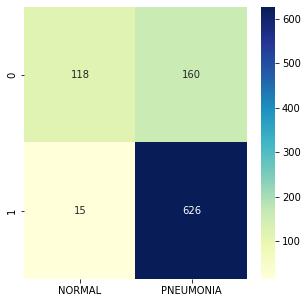

In [ ]:
confusion_matrix_df = pd.DataFrame(cm, columns = categories)
plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix_df,  annot=True,  fmt="d", cmap="YlGnBu")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
#Results
print("Accuracy is: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy is: ", balanced_accuracy_score(y_test, y_pred))
print("Recall is: ",recall_score(y_test, y_pred))
print("Precision is: ",precision_score(y_test, y_pred))
print("F1 Weighted Score is: ",f1_score(y_test, y_pred, average = 'weighted'))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cm)
tn, fp, fn, tp = cm.ravel()
print("True Negative: ", tn, "False Positive: ", fp, "False Negative: ", fn, "True Positive: ", tp)

Accuracy is:  0.8585418933623504
Balanced Accuracy is:  0.7712797001088676
Recall is:  0.9921996879875195
Precision is:  0.835742444152431
F1 Weighted Score is:  0.845129023378582
Confusion Matrix:  [[153 125]
 [  5 636]]
True Negative:  153 False Positive:  125 False Negative:  5 True Positive:  636


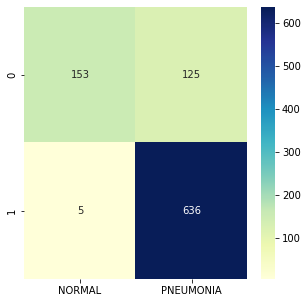

In [ ]:
confusion_matrix_df = pd.DataFrame(cm, columns = categories)
plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix_df,  annot=True,  fmt="d", cmap="YlGnBu")

Addresing Class Imbalance by Upsampling or Downsampling

In [ ]:
def fix_class_imabalance(major_data, minor_data, strategy):
  if strategy == "upsample":
    upsampled_data = resample(minor_data, replace = True, n_samples = len(major_data), random_state = 42)
    return upsampled_data
  
  if strategy == "downsample":
    downsampled_data = resample(major_data, replace = True, n_samples = len(minor_data), random_state = 42)
    return downsampled_data

In [ ]:
pn_downsample = fix_class_imabalance(major_data = pn, minor_data = normal, strategy = "downsample")

In [ ]:
print(len(pn_downsample))

1583


In [ ]:
normal_upsample = fix_class_imabalance(major_data = pn, minor_data = normal, strategy = "upsample")

In [ ]:
print(len(normal_upsample))

4273


In [ ]:
train_imgs_down = pn_downsample[:1224]+ normal[:1224] 
test_imgs_down = pn_downsample[1224:1502]+ normal[1224:1502]
val_imgs_down = pn_downsample[1502:] + normal[1502:]

In [ ]:
train_imgs_up = normal_upsample[:3418]+ normal[:3418] 
test_imgs_up = normal_upsample[3418:4059]+ normal[3418:4059]
val_imgs_up = normal_upsample[4059:] + normal[4059:]

In [ ]:
import random
random.shuffle(train_imgs_down)
random.shuffle(test_imgs_down)
random.shuffle(val_imgs_down)
random.shuffle(train_imgs_up)
random.shuffle(test_imgs_up)
random.shuffle(val_imgs_up)
img_size = 224

In [ ]:
X_train_d, y_train_d = preprocess_image(train_imgs_down)
X_val_d, y_val_d = preprocess_image(val_imgs_down)
X_test_d, y_test_d = preprocess_image(test_imgs_down)
X_train_u, y_train_u = preprocess_image(train_imgs_up)
X_val_u, y_val_u = preprocess_image(val_imgs_up)
X_test_u, y_test_u = preprocess_image(test_imgs_up)

In [ ]:
X_train_d = np.asarray(X_train_d)
y_train_d = np.asarray(y_train_d)
X_val_d = np.asarray(X_val_d)
y_val_d = np.asarray(y_val_d)
X_test_d = np.asarray(X_test_d)
y_test_d = np.asarray(y_test_d)

In [ ]:
X_train_u = np.asarray(X_train_u)
y_train_u = np.asarray(y_train_u)
X_val_u = np.asarray(X_val_u)
y_val_u = np.asarray(y_val_u)
X_test_u = np.asarray(X_test_u)
y_test_u = np.asarray(y_test_u)

Accuracy is:  0.8345323741007195
Balanced Accuracy is:  0.8345323741007193
Recall is:  0.9496402877697842
Precision is:  0.7719298245614035
F1 Weighted Score is:  0.8323105166535536
Confusion Matrix:  [[200  78]
 [ 14 264]]
True Negative:  200 False Positive:  78 False Negative:  14 True Positive:  264


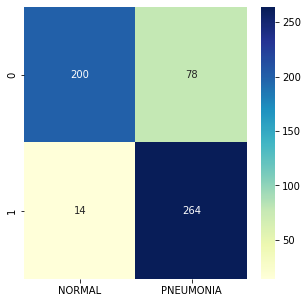

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_down = KNeighborsClassifier(n_neighbors = 10)
knn_model_down.fit(X_train_d,y_train_d)
y_pred = knn_model_down.predict(X_test_d)
#Results
down_acc = accuracy_score(y_test_d, y_pred)
down_bal_acc = balanced_accuracy_score(y_test_d, y_pred)
down_recall = recall_score(y_test_d, y_pred)
down_precision = precision_score(y_test_d, y_pred)
down_f1 = f1_score(y_test_d, y_pred, average = 'weighted')
print("Accuracy is: ", down_acc)
print("Balanced Accuracy is: ", down_bal_acc)
print("Recall is: ",down_recall)
print("Precision is: ",down_precision)
print("F1 Weighted Score is: ",down_f1)
cm = confusion_matrix(y_test_d, y_pred)
print("Confusion Matrix: ", cm)
tn, fp, fn, tp = cm.ravel()
print("True Negative: ", tn, "False Positive: ", fp, "False Negative: ", fn, "True Positive: ", tp)
confusion_matrix_df = pd.DataFrame(cm, columns = categories)
plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix_df,  annot=True,  fmt="d", cmap="YlGnBu")

In [ ]:
knn_model_up = KNeighborsClassifier(n_neighbors = 10)
knn_model_up.fit(X_train_u,y_train_u)
y_pred = knn_model_up.predict(X_test_u)
#Results
up_acc = accuracy_score(y_test_u, y_pred)
up_bal_acc = balanced_accuracy_score(y_test_u, y_pred)
up_recall = recall_score(y_test_u, y_pred, zero_division=1)
up_precision = precision_score(y_test_u, y_pred, zero_division=1)
up_f1 = f1_score(y_test_u, y_pred, average = 'weighted')
print("Accuracy is: ", up_acc)
print("Balanced Accuracy is: ", up_bal_acc)
print("Recall is: ",up_recall)
print("Precision is: ",up_precision)
print("F1 Weighted Score is: ",up_f1)
cm = confusion_matrix(y_test_u, y_pred)
print("Confusion Matrix: ", cm)
if len(cm)==4:
  tn, fp, fn, tp = cm.ravel()
  print("True Negative: ", tn, "False Positive: ", fp, "False Negative: ", fn, "True Positive: ", tp)
  confusion_matrix_df = pd.DataFrame(cm, columns = categories)
  plt.subplots(figsize=(5,5))
  ax = sns.heatmap(confusion_matrix_df,  annot=True,  fmt="d", cmap="YlGnBu")

Accuracy is:  1.0
Balanced Accuracy is:  1.0
Recall is:  1.0
Precision is:  1.0
F1 Weighted Score is:  1.0
Confusion Matrix:  [[641]]


In [ ]:
labels = ['Accuracy', 'Balanced Accuracy', 'Recall', 'Precision', 'F1-Score']
down = [down_acc, down_bal_acc, down_recall, down_precision, down_f1]
up = [up_acc, up_bal_acc, up_recall, up_precision, up_f1]

In [ ]:
x = np.arange(len(labels))
width = 0.35

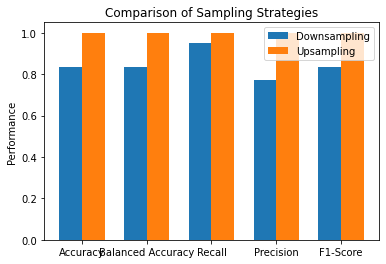

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, down, width, label='Downsampling')
rects2 = ax.bar(x + width/2, up, width, label='Upsampling')
ax.set_ylabel('Performance')
ax.set_title('Comparison of Sampling Strategies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

Hyperparameter Search using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [50,100],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
rf_grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 3,verbose=3)
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50;, score=0.936 total time=  14.9s
[CV 2/3] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50;, score=0.921 total time=  14.1s
[CV 3/3] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50;, score=0.939 total time=  13.1s
[CV 1/3] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.935 total time=  28.3s
[CV 2/3] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.926 total time=  24.9s
[CV 3/3] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.939 total time=  24.5s
[CV 1/3] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50;, score=0.936 total time=  14.4s
[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50;, score=0.921 total time=  13.0s
[CV 3/3] END criterion=gini, max_depth=4, max_features=s

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100]},
             verbose=3)

In [ ]:
y_pred = rf_grid.predict(X_test)

In [ ]:
#Results
print("Accuracy is: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy is: ", balanced_accuracy_score(y_test, y_pred))
print("Recall is: ",recall_score(y_test, y_pred))
print("Precision is: ",precision_score(y_test, y_pred))
print("F1 Weighted Score is: ",f1_score(y_test, y_pred, average = 'weighted'))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cm)
tn, fp, fn, tp = cm.ravel()
print("True Negative: ", tn, "False Positive: ", fp, "False Negative: ", fn, "True Positive: ", tp)

Accuracy is:  0.8650707290533188
Balanced Accuracy is:  0.7932748964634844
Recall is:  0.9750390015600624
Precision is:  0.8526603001364257
F1 Weighted Score is:  0.856211403020235
Confusion Matrix:  [[170 108]
 [ 16 625]]
True Negative:  170 False Positive:  108 False Negative:  16 True Positive:  625
